In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
import geopandas as gpd

# 設定字體
#! gdown -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(font=['Taipei Sans TC Beta'])

#### 從老化指數看見台灣老化趨勢

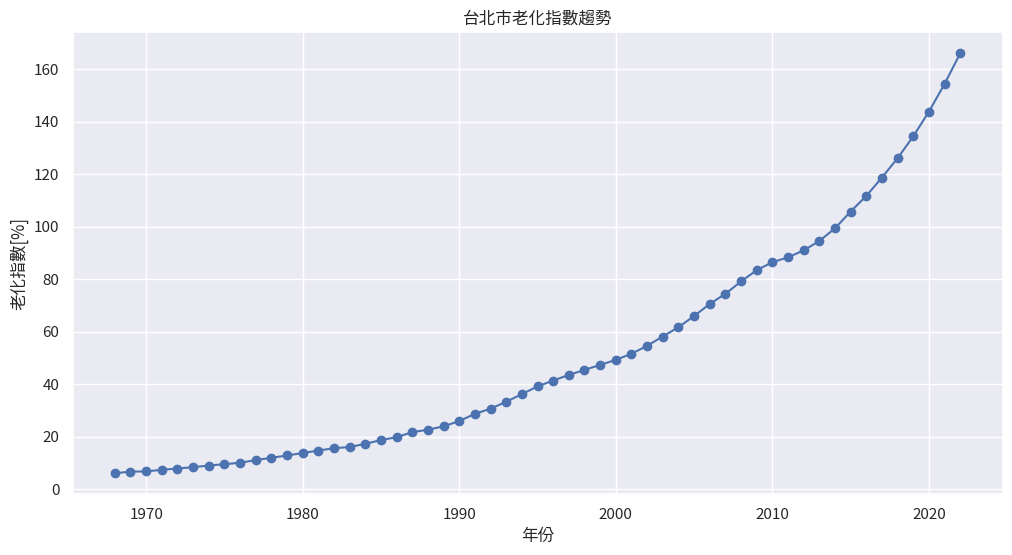

In [29]:
aging_index_data = pd.read_csv('data/台北市_老化指數.csv', encoding='big5')
aging_index_data['年份'] = 1911 + aging_index_data['年底別'].str.extract(r'(\d+)年').astype(int)

plt.figure(figsize=(12, 6))
plt.plot(aging_index_data['年份'], aging_index_data['老化指數[%]'], marker='o')
plt.title('台北市老化指數趨勢')
plt.xlabel('年份')
plt.ylabel('老化指數[%]')
plt.grid(True)
plt.show()

##### 各項指數變化趨勢

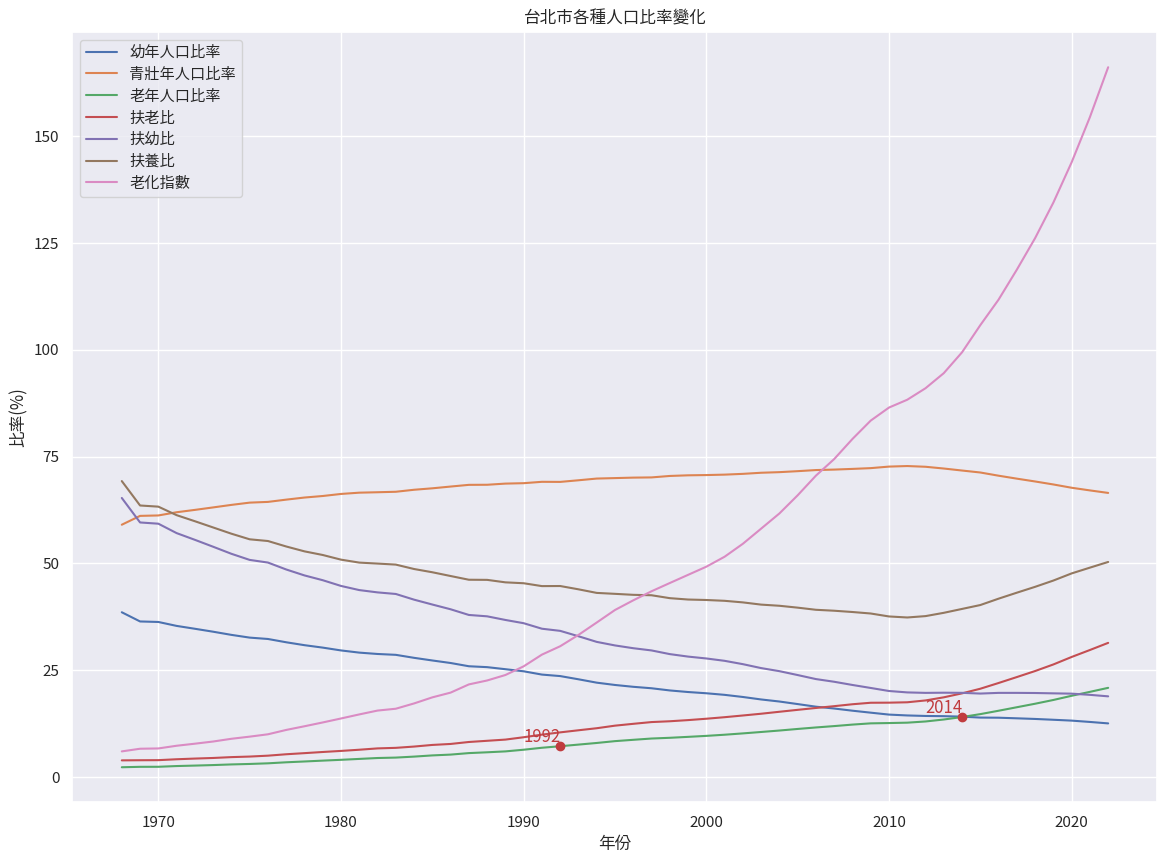

In [51]:

plt.figure(figsize=(14, 10))

sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['幼年人口占全市人口比率[%]'], label='幼年人口比率')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['青壯年人口占全市人口比率[%]'], label='青壯年人口比率')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['老年人口占全市人口比率[%]'], label='老年人口比率')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['扶老比[%]'], label='扶老比')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['扶幼比[%]'], label='扶幼比')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['扶養比[%]'], label='扶養比')
sns.lineplot(x=aging_index_data['年份'], y=aging_index_data['老化指數[%]'], label='老化指數')

highlight_years = [1992, 2014]
for year in highlight_years:
    # 提取特定年份的数据
    year_data = aging_index_data[aging_index_data['年份'] == year]
    if not year_data.empty:
        plt.plot(year, year_data['老年人口占全市人口比率[%]'].values[0], 'o', color='#C03C3F')
        plt.text(year, year_data['老年人口占全市人口比率[%]'].values[0], f'{year}', fontsize=12, color='#C03C3F', ha='right', va='bottom')

plt.title('台北市各種人口比率變化')
plt.xlabel('年份')
plt.ylabel('比率(%)')
plt.legend()
plt.show()


##### 老年人口與總人口成長趨勢

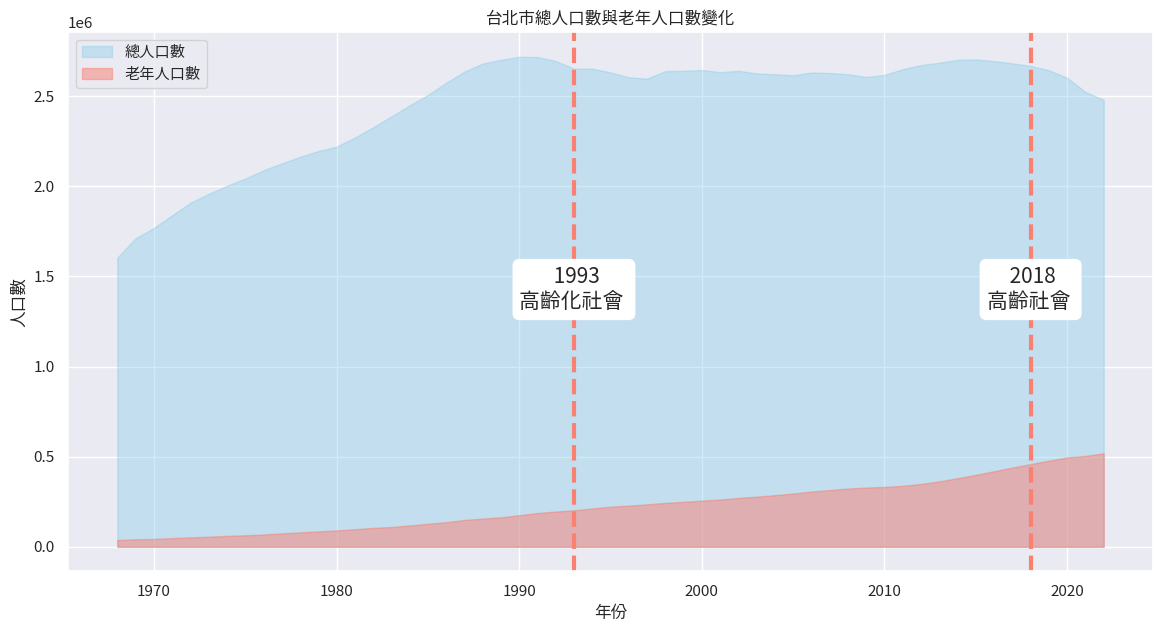

In [31]:
aging_index_data = pd.read_csv('data/台北市_老化指數.csv', encoding='big5')

aging_index_data['年份'] = 1911 + aging_index_data['年底別'].str.extract(r'(\d+)年').astype(int)
aging_index_data['總人口數'] = aging_index_data['幼年人口數[人]'] + aging_index_data['青壯年人口數[人]'] + aging_index_data['老年人口數[人]']

plt.figure(figsize=(14, 7))
plt.fill_between(aging_index_data['年份'], aging_index_data['總人口數'], color="skyblue", alpha=0.4, label='總人口數')
plt.fill_between(aging_index_data['年份'], aging_index_data['老年人口數[人]'], color="salmon", alpha=0.5, label='老年人口數')

for year, label in zip([1993, 2018], ['1993\n高齡化社會', '2018\n高齡社會']):
    plt.axvline(x=year, color='salmon', linestyle='--', linewidth=3)
    plt.text(year, plt.gca().get_ylim()[1] / 2, f' {label} ', fontsize=15, 
             backgroundcolor='white', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white'))

plt.title('台北市總人口數與老年人口數變化')
plt.xlabel('年份')
plt.ylabel('人口數')
plt.legend()
plt.show()


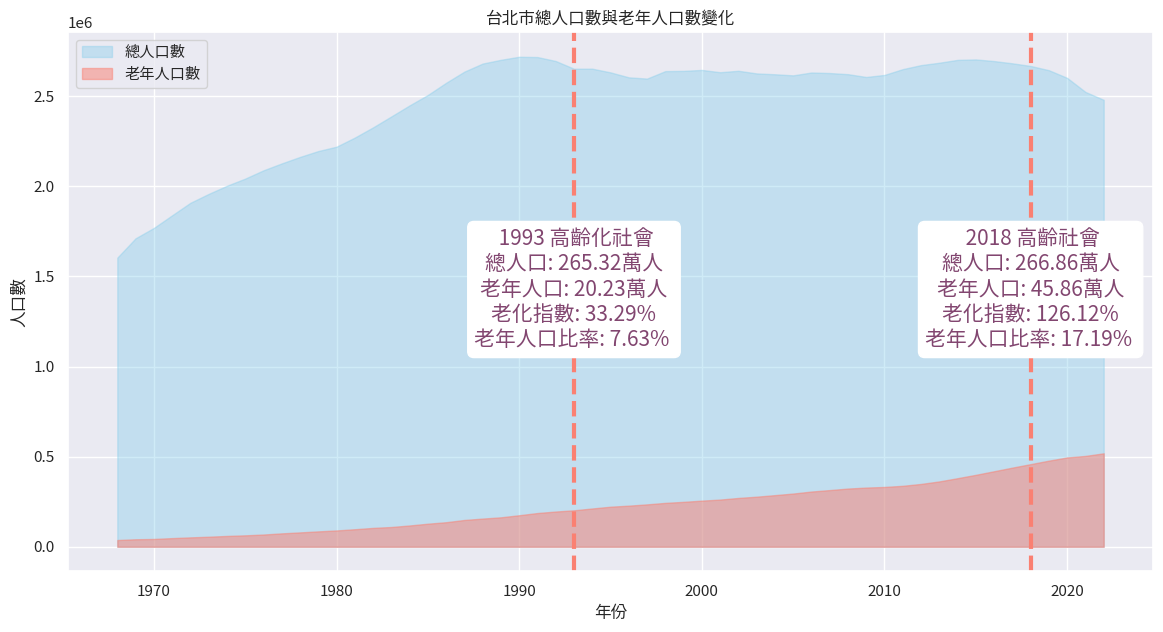

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
aging_index_data = pd.read_csv('data/台北市_老化指數.csv', encoding='big5')

# Extract the year and calculate the total population
aging_index_data['年份'] = 1911 + aging_index_data['年底別'].str.extract(r'(\d+)年').astype(int)
aging_index_data['總人口數'] = aging_index_data['幼年人口數[人]'] + aging_index_data['青壯年人口數[人]'] + aging_index_data['老年人口數[人]']

# Convert population to ten thousands
aging_index_data['總人口(萬人)'] = aging_index_data['總人口數'] / 10000
aging_index_data['老年人口(萬人)'] = aging_index_data['老年人口數[人]'] / 10000

# Plotting the data
plt.figure(figsize=(14, 7))
plt.fill_between(aging_index_data['年份'], aging_index_data['總人口數'], color="skyblue", alpha=0.4, label='總人口數')
plt.fill_between(aging_index_data['年份'], aging_index_data['老年人口數[人]'], color="salmon", alpha=0.5, label='老年人口數')

# Annotate specific years with additional information
for year in [1993, 2018]:
    row = aging_index_data[aging_index_data['年份'] == year]
    if not row.empty:
        row = row.iloc[0]
        label = (
            f"{year} 高齡化社會\n" 
            f"總人口: {row['總人口(萬人)']:.2f}萬人\n"
            f"老年人口: {row['老年人口(萬人)']:.2f}萬人\n"
            f"老化指數: {row['老化指數[%]']}%\n"
            f"老年人口比率: {row['老年人口占全市人口比率[%]']}%" if year == 1993 else f"{year} 高齡社會\n"
            f"總人口: {row['總人口(萬人)']:.2f}萬人\n"
            f"老年人口: {row['老年人口(萬人)']:.2f}萬人\n"
            f"老化指數: {row['老化指數[%]']}%\n"
            f"老年人口比率: {row['老年人口占全市人口比率[%]']}%"
        )
    plt.axvline(x=year, color='salmon', linestyle='--', linewidth=3)
    plt.text(year, plt.gca().get_ylim()[1] / 2, f' {label} ', fontsize=15, 
             backgroundcolor='white', ha='center', va='center', 
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='white'),color='#824670')


# Set the title and labels
plt.title('台北市總人口數與老年人口數變化')
plt.xlabel('年份')
plt.ylabel('人口數')
plt.legend()
plt.show()


##### 行政區人口密度

C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


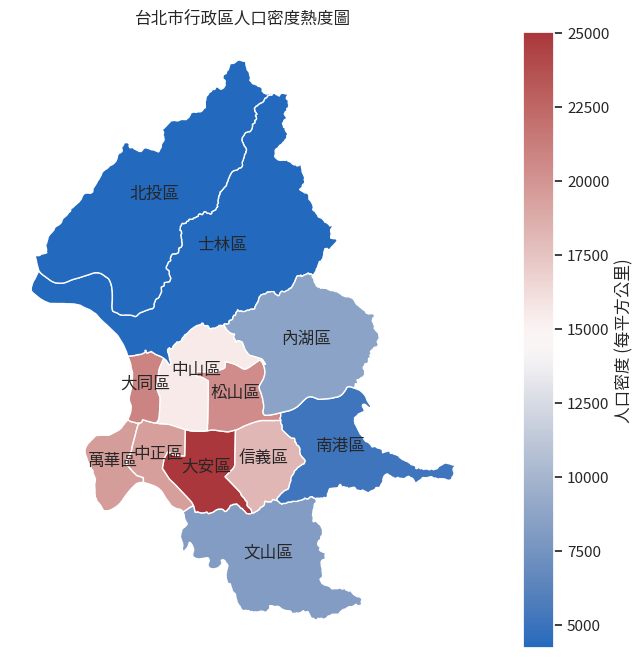

In [26]:
# 載入CSV檔案，其中包含人口密度資料
file_path_csv = 'data/全國人口資料庫統計地圖.csv'  # 請替換為實際檔案路徑
population_data = pd.read_csv(file_path_csv)

# 將人口密度的格式轉換為數值
population_data['人口密度'] = population_data['人口密度'].str.replace(',', '').astype(float)

# 載入Shapefile，其中包含台北市行政區的地理資訊
file_path_shp = 'shapefiles/TOWN_MOI_1120825.shp'  # 請替換為實際檔案路徑
shape_data = gpd.read_file(file_path_shp)

# 篩選出台北市的行政區資料
taipei_shape_data = shape_data[shape_data['COUNTYNAME'] == '臺北市']

# 根據行政區名稱合併人口密度資料和地理資訊
merged_data = taipei_shape_data.merge(population_data, left_on='TOWNNAME', right_on='區域別')

# 製作熱度圖
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='人口密度', ax=ax, legend=True, cmap='vlag',
                 legend_kwds={'label': "人口密度 (每平方公里)"})
ax.set_title('台北市行政區人口密度熱度圖')
ax.axis('off')

# 在每個行政區的代表點上添加名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center')

plt.show()


##### 各行政區老年人人口數

C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


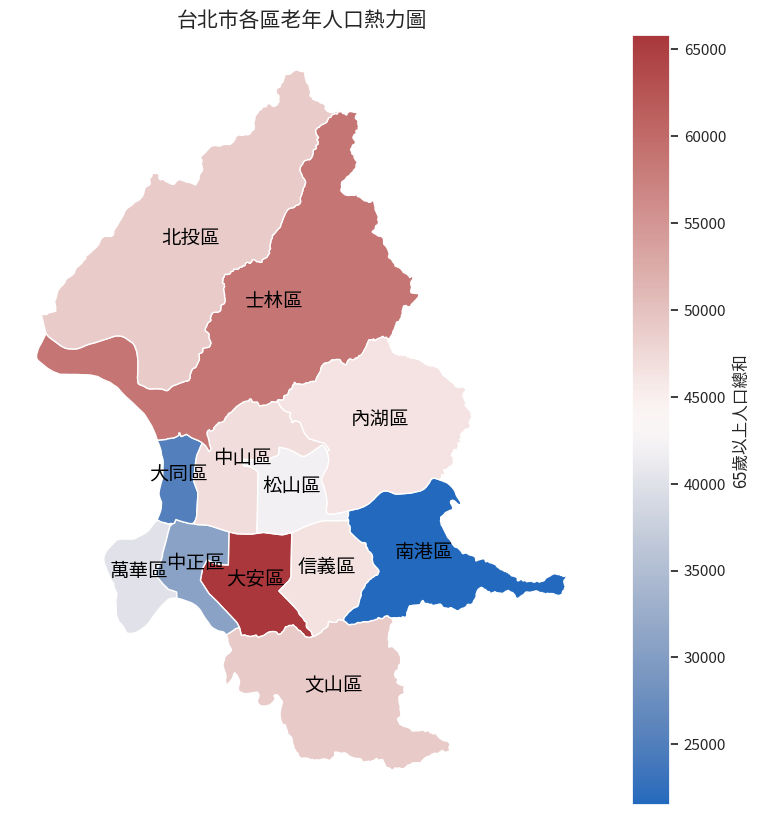

In [28]:
# 載入CSV檔案，其中包含人口密度資料
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
file_path_csv = 'data/台北_行政區老年人口.csv'  # 請替換為實際檔案路徑
population_data = pd.read_csv(file_path_csv)

# 將人口密度的格式轉換為數值
#population_data['人口密度'] = population_data['人口密度'].str.replace(',', '').astype(float)

# 載入Shapefile，其中包含台北市行政區的地理資訊
file_path_shp = 'shapefiles/TOWN_MOI_1120825.shp'  # 請替換為實際檔案路徑
shape_data = gpd.read_file(file_path_shp)

# 篩選出台北市的行政區資料
taipei_shape_data = shape_data[shape_data['COUNTYNAME'] == '臺北市']

# 根據行政區名稱合併人口密度資料和地理資訊
merged_data = taipei_shape_data.merge(population_data, left_on='TOWNNAME', right_on='區域別')

# 製作熱度圖
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag', 
                 legend_kwds={'label': "65歲以上人口總和"},
                 edgecolor='white')

# Adding titles and labels
ax.set_title('台北市各區老年人口熱力圖', fontdict={'fontsize': 15})
ax.set_axis_off()
# 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')

plt.show()

##### 行政區老年人口數和老人福利機構分布

C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


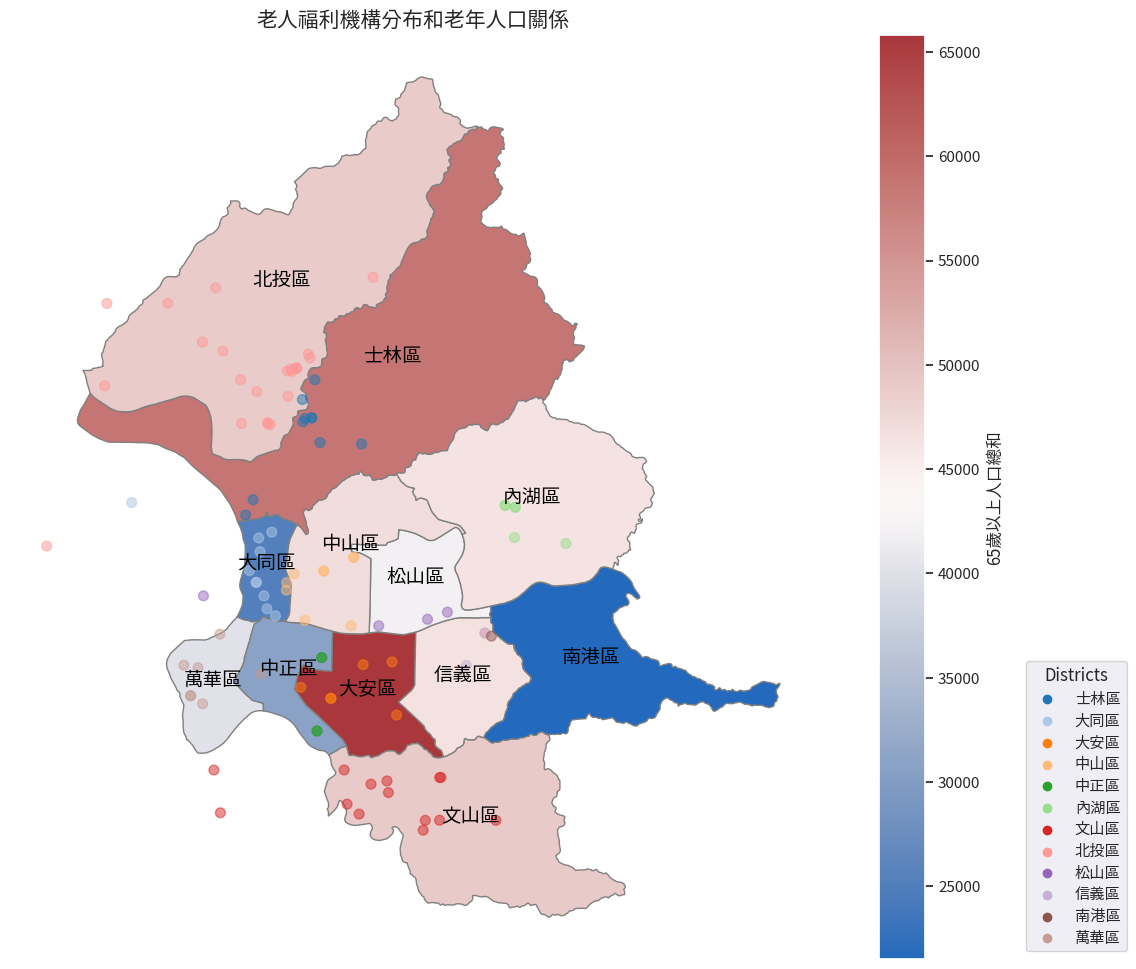

In [33]:
elderly_population_file = 'data/台北_行政區老年人口.csv'
taipei_data = pd.read_csv(elderly_population_file)
taipei_data_renamed = taipei_data.rename(columns={'區域別': 'TOWNNAME'})

shapefile_path = 'shapefiles/TOWN_MOI_1120825.shp'
taipei_map = gpd.read_file(shapefile_path)
taipei_districts = taipei_map[taipei_map['COUNTYNAME'] == '臺北市']

merged_data = taipei_districts.merge(taipei_data_renamed, on='TOWNNAME')

institutions_file_path = 'data/臺北市老人福利機構名冊.csv'
institutions_data = pd.read_csv(institutions_file_path)
gdf_institutions = gpd.GeoDataFrame(
    institutions_data, 
    geometry=gpd.points_from_xy(institutions_data['經度'], institutions_data['緯度'])
)

palette = sns.color_palette("tab20", len(institutions_data['區域別'].unique()))
district_colors = {district: color for district, color in zip(institutions_data['區域別'].unique(), palette)}

# Creating the heatmap with institution locations
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
base = merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag', 
                        legend_kwds={'label': "65歲以上人口總和"},
                        edgecolor='grey')
gdf_institutions.plot(ax=base, marker='o', color=gdf_institutions['區域別'].map(district_colors), 
                      markersize=50, alpha=0.5)

# Adding titles and labels
ax.set_title('老人福利機構分布和老年人口關係', fontdict={'fontsize': 15})
ax.set_axis_off()

# Adding a legend for institutions
for district, color in district_colors.items():
    ax.scatter([], [], c=[color], label=district)
ax.legend(title='Districts', loc='lower left', bbox_to_anchor=(1.25, 0))
# 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')

plt.show()
